In [ ]:
#install specific version of libraries used 
!pip install pandas
!pip install numpy
!pip install scipy
!pip install seaborn
!pip install sklearn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(url)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
!pip install scikit-learn==1.6.0

In [11]:
#Linear Regression and Multiple Linear Regression

#Modules for linear regression
from sklearn.linear_model import LinearRegression

In [12]:
#Create the linear regression object:
lm = LinearRegression()

# look at how highway-mpg can help us predict car price
X = df[['highway-mpg']]
Y = df['price']

#Fit the linear model using highway-mpg:
lm.fit(X,Y)

#output a prediction:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [16]:
#value of the intercept (a):
print("The value of the intercept is: ", lm.intercept_)

#value of the slope (b)
print("The value of the slope is: ", lm.coef_)

#the final estimated linear model
#Price = 38423.31 - 821.73 x highway-mpg

The value of the intercept is:  38423.3058581574
The value of the slope is:  [-821.73337832]


In [17]:
#Multiple Linear Regression

#predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lm.fit(Z, df['price'])

#value of the intercept (a):
print("The value of the intercept is: ", lm.intercept_)

#value of the slope (b)
print("The value of the slope is: ", lm.coef_)

The value of the intercept is:  -15806.624626329209
The value of the slope is:  [53.49574423  4.70770099 81.53026382 36.05748882]


(0.0, 48184.04987711977)

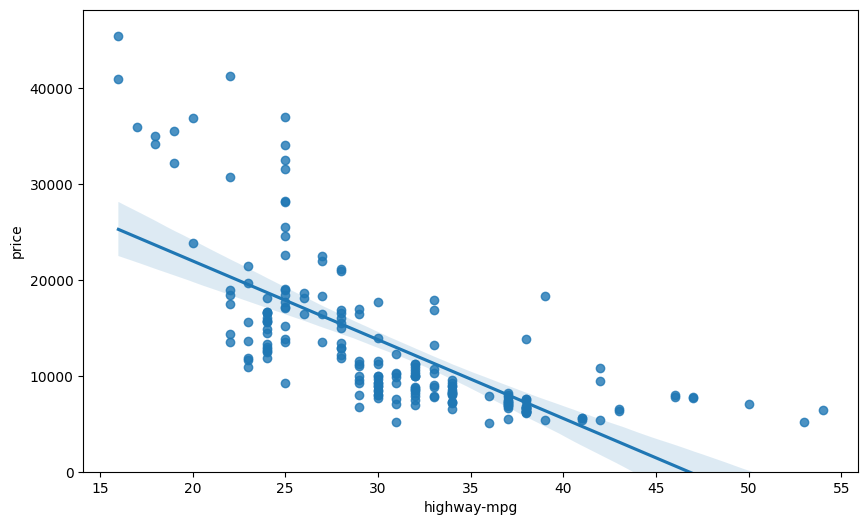

In [18]:
#visualize highway-mpg as potential predictor variable of price
width = 10
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

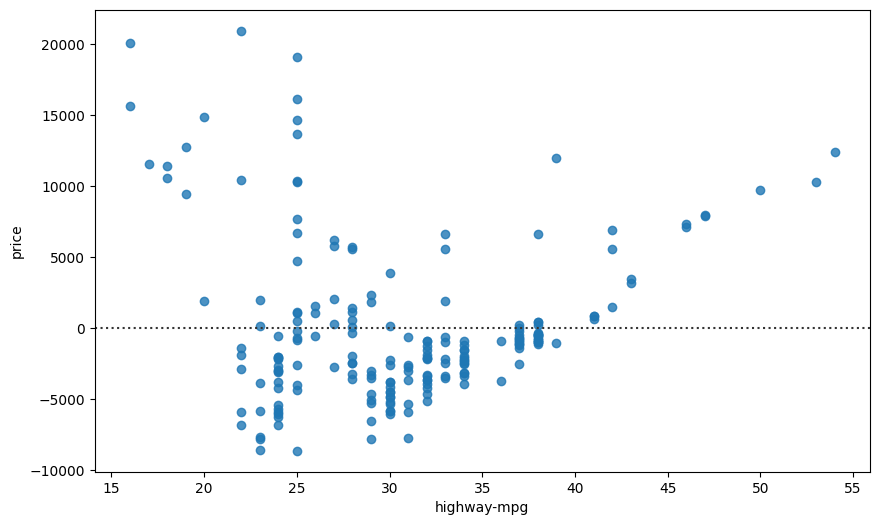

In [19]:
#visualize the variance of the data using a residual plot
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [ ]:
#in the above residual plot we see that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data

/tmp/ipykernel_1909/751861757.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
/tmp/ipykernel_1909/751861757.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values

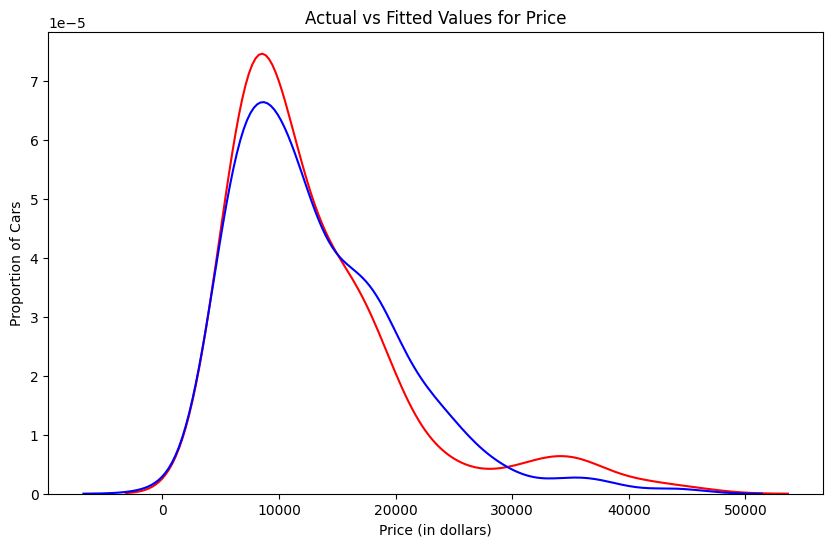

In [20]:
Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
#Polynomial Regression and Pipelines

In [21]:
#function to plot the data:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


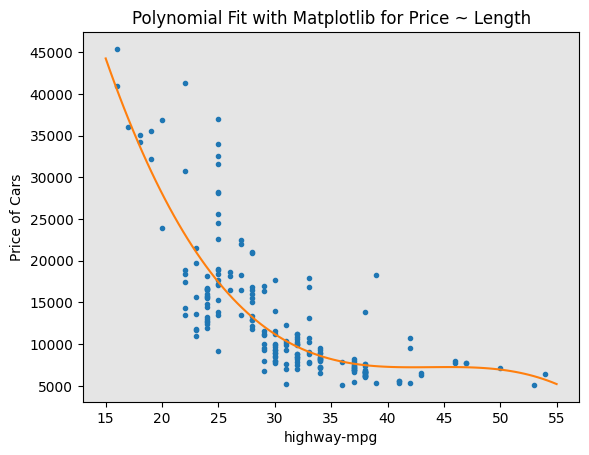

In [22]:
#Get the variables
x = df['highway-mpg']
y = df['price']

#fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
np.polyfit(x, y, 3)

In [25]:
#polynomial transform on multiple features
from sklearn.preprocessing import PolynomialFeatures

#create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)

print("Original data (sample, features) ==", Z.shape)
print("Transformed data (sample, features) ==", Z_pr.shape)

Original data (sample, features) == (201, 4)
Transformed data (sample, features) == (201, 15)


In [ ]:
#Pipeline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [27]:
#create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

#input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)

#convert the data type Z to type float
Z = Z.astype(float)
pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [ ]:
#Measures for In-Sample Evaluation

In [30]:
#Model 1: Simple Linear Regression
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [31]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [34]:
#Model 2: Multiple Linear Regression
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [35]:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [36]:
#Model 3: Polynomial Fit
from sklearn.metrics import r2_score

In [37]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906517


In [38]:
mean_squared_error(df['price'], p(x))

20474146.426361226